<a href="https://colab.research.google.com/github/pathilink/triggo-ai_case/blob/main/notebook/triggo_ai_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triggo.ai Technical Test [Exploratory Data Analysis]

## Setups

If <font color='red'>ModuleNotFoundError</font>

In [1]:
!pip install pandasql

## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

from pandasql import sqldf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [3]:
# display all columns
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/test/triggo-ai/full_df.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000,2017-10-02 11:07:15.000000,2017-10-04 19:55:00.000000,2017-10-10 21:25:13.000000,2017-10-18 00:00:00.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23,-46,1.0,credit_card,1.0,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.000000,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00.000000,2017-10-12 03:43:48.000000,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23,-46
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000,2017-10-02 11:07:15.000000,2017-10-04 19:55:00.000000,2017-10-10 21:25:13.000000,2017-10-18 00:00:00.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23,-46,2.0,voucher,1.0,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.000000,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00.000000,2017-10-12 03:43:48.000000,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23,-46
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000,2017-10-02 11:07:15.000000,2017-10-04 19:55:00.000000,2017-10-10 21:25:13.000000,2017-10-18 00:00:00.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23,-46,3.0,voucher,1.0,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.000000,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00.000000,2017-10-12 03:43:48.000000,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23,-46
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37.000000,2018-07-26 03:24:27.000000,2018-07-26 14:31:00.000000,2018-08-07 15:27:45.000000,2018-08-13 00:00:00.000000,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12,-45,1.0,boleto,1.0,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27.000000,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00.000000,2018-08-08 18:37:50.000000,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,-19,-43
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37.000000,2018-07-26 03:24:27.000000,2018-07-26 14:31:00.000000,2018-08-07 15:27:45.000000,2018-08-13 00:00:00.000000,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12,-44,1.0,boleto,1.0,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27.000000,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00.000000,2018-08-08 18:37:50.000000,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,-19,-43


In [5]:
df_ = df.copy()

## Questions

In [6]:
# run SQL
pysqldf = lambda q: sqldf(q, globals())

### a) What is the volume of orders per month? Are there seasonal sales?

In [7]:
monthly_orders = pysqldf("""
  WITH temp AS(
    SELECT DISTINCT
      order_id
      , order_purchase_timestamp
    FROM df_
  )

  SELECT
    STRFTIME('%Y-%m', order_purchase_timestamp) AS year_month
    , COUNT(*) AS order_count
  FROM temp
  GROUP BY 1
  ORDER BY 1
""")

monthly_orders.head()

,year_month,order_count
0,2016-09,3
1,2016-10,308
2,2016-12,1
3,2017-01,789
4,2017-02,1732


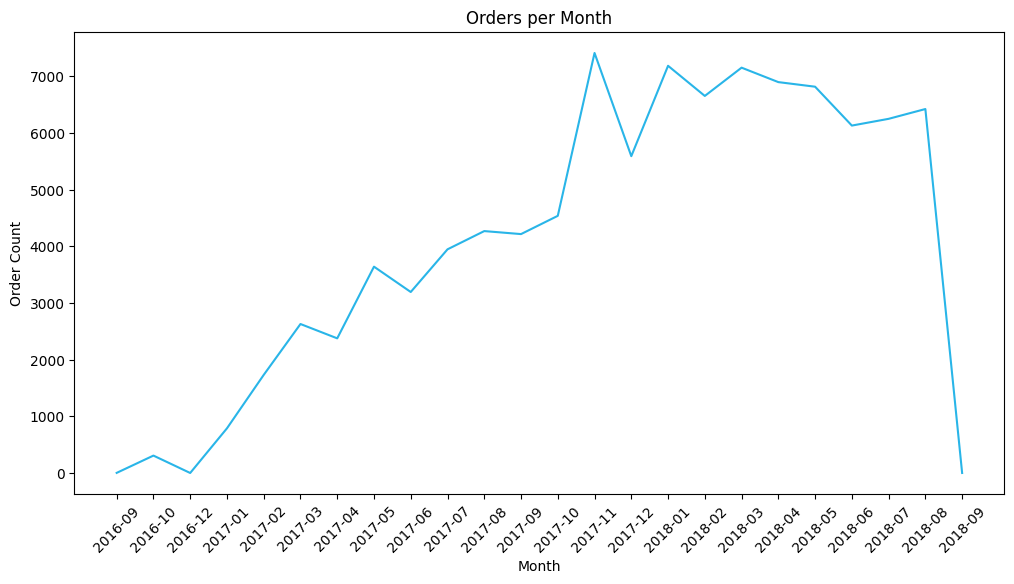

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_orders, x='year_month', y='order_count', color='#29B5E8')
plt.xticks(rotation=45)
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()

<font color='blue'>There doesn't seem to be any seasonality, but in the two months of December shown in the data, there was a drop in orders compared to the previous month.</font>

### b) What is the distribution of order delivery times?

In [9]:
delivery_time_diff = pysqldf("""
  WITH temp AS(
    SELECT DISTINCT
      order_id
    , order_delivered_customer_date
    , order_delivered_carrier_date
    FROM df_
  ),
  diff_calc AS(
    SELECT
      order_id
      , order_delivered_customer_date
      , order_delivered_carrier_date
      , JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_delivered_carrier_date) AS delivery_time_diff
    FROM temp
  )
  SELECT *
  FROM diff_calc
  WHERE delivery_time_diff >= 0
""")

delivery_time_diff.head()

,order_id,order_delivered_customer_date,order_delivered_carrier_date,delivery_time_diff
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13.000000,2017-10-04 19:55:00.000000,6.062650
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45.000000,2018-07-26 14:31:00.000000,12.039410
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29.000000,2018-08-08 13:50:00.000000,9.178113
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42.000000,2017-11-22 13:39:59.000000,9.450498
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02.000000,2018-02-14 19:46:34.000000,1.937824


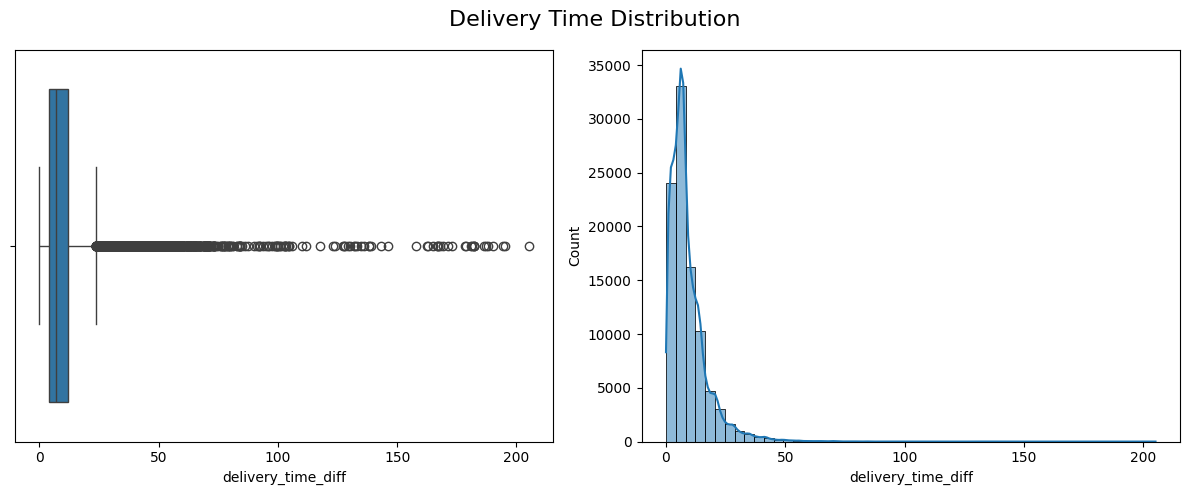

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=delivery_time_diff['delivery_time_diff'])

plt.subplot(1, 2, 2)
sns.histplot(x=delivery_time_diff['delivery_time_diff'], bins=50, kde=True)

plt.suptitle('Delivery Time Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])  # space for the title not to overlap

plt.show()

In [11]:
delivery_time_diff.describe()

,delivery_time_diff
count,95976.000000
mean,9.322764
std,8.755981
min,0.000000
25%,4.096730
50%,7.096366
75%,12.022986
max,205.190972


<font color='blue'>On average, deliveries were made in 9 days. Half of them could be delivered in up to 7 days.</font>

### c) What is the relationship between freight costs and delivery distance?

In [12]:
frei_dist = pysqldf("""
WITH temp AS(
  SELECT DISTINCT
    order_id
    , freight_value
    , customer_lat
    , customer_lng
    , seller_lat
    , seller_lng
  FROM df_
),
  dist_calc AS (
    SELECT
      order_id
      , freight_value
      , 6371 * 2 *
      ASIN(
        SQRT(
          POWER(SIN(RADIANS((seller_lat - customer_lat) / 2)), 2) +
          COS(RADIANS(customer_lat)) * COS(RADIANS(seller_lat)) *
          POWER(SIN(RADIANS((seller_lng - customer_lng) / 2)), 2)
        )
      ) AS distance_km
    FROM temp
)
  SELECT *
  FROM dist_calc
""")

frei_dist.head()

,order_id,freight_value,distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,8.72,0.000000
1,53cdb2fc8bc7dce0b6741e2150273451,22.76,700.670720
2,53cdb2fc8bc7dce0b6741e2150273451,22.76,667.169560
3,53cdb2fc8bc7dce0b6741e2150273451,22.76,792.721958
4,47770eb9100c2d0c44946d9cf07ec65d,19.22,444.779707


Text(0.5, 1.0, 'Boxplot - Distance (km)')

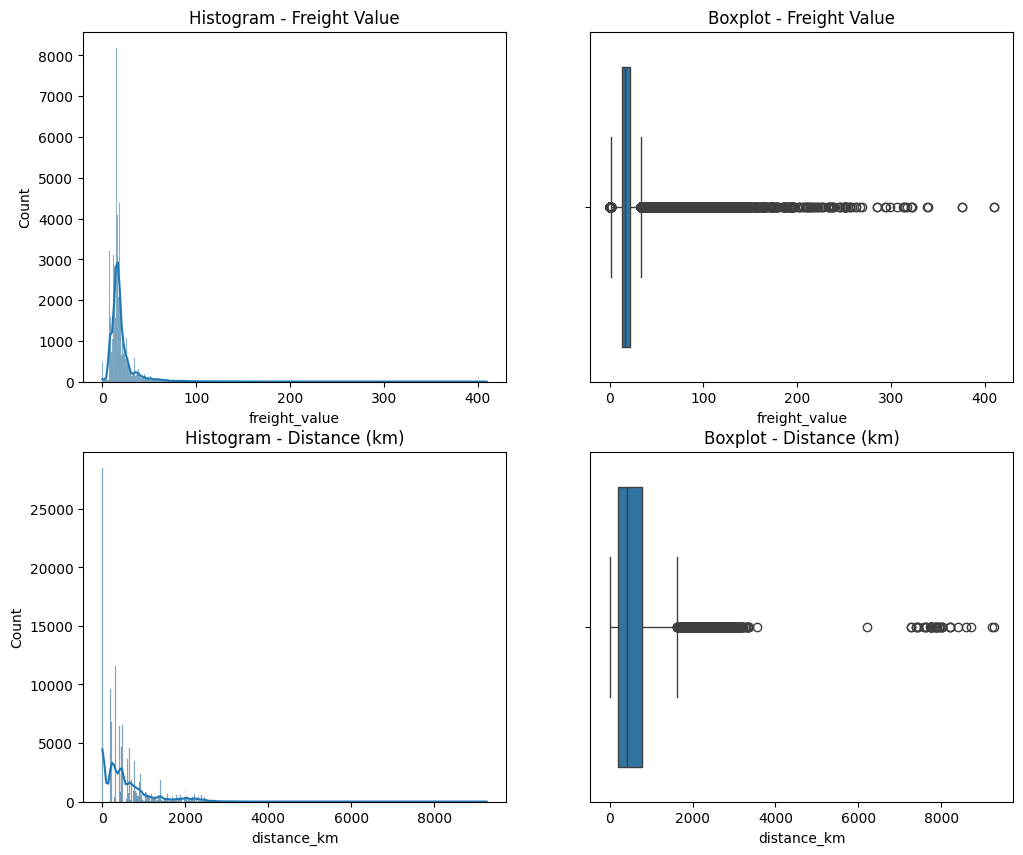

In [13]:
# check normal distribution
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram Freight Value
sns.histplot(frei_dist['freight_value'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histogram - Freight Value')

# Boxplot Freight Value
sns.boxplot(x=frei_dist['freight_value'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot - Freight Value')

# Histogram Distance
sns.histplot(frei_dist['distance_km'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram - Distance (km)')

# Boxplot Distance
sns.boxplot(x=frei_dist['distance_km'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot - Distance (km)')

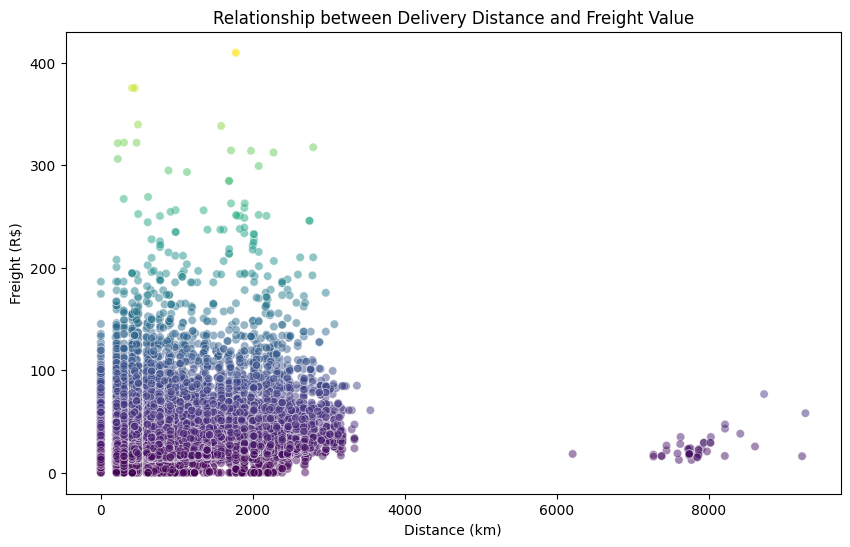

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance_km', y='freight_value', hue='freight_value', legend=False, data=frei_dist, palette='viridis', alpha=0.5)
plt.title('Relationship between Delivery Distance and Freight Value')
plt.xlabel('Distance (km)')
plt.ylabel('Freight (R$)')
plt.show()

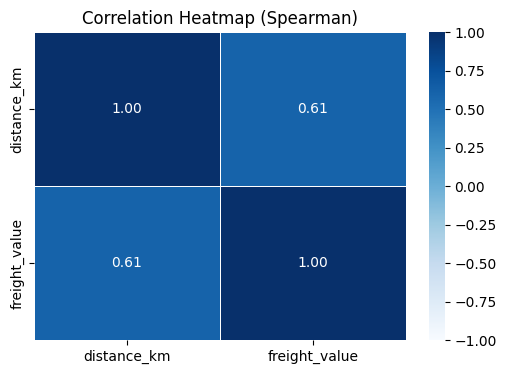

In [15]:
corr_matrix = frei_dist[['distance_km', 'freight_value']].corr(method='spearman') # not normal distribution

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap (Spearman)')
plt.show()


<font color='blue'>The correlation coefficient of 0.61 indicates a moderate positive relationship between delivery distance and freight price. In other words, as the distance increases, the value of the freight tends to increase as well.</font>

### d) What are the best-selling product categories in terms of turnover?

In [16]:
total_turnover = pysqldf("""
WITH temp AS(
  SELECT DISTINCT
    order_id
    , product_category_name
    , price
  FROM df_
)

  SELECT
    product_category_name
    , SUM(price) AS total_turnover
    FROM temp
    GROUP BY 1
    ORDER BY 2 DESC

""")

total_turnover.head(10)

,product_category_name,total_turnover
0,beleza_saude,1203129.05
1,relogios_presentes,1177464.58
2,cama_mesa_banho,940827.36
3,esporte_lazer,925360.61
4,informatica_acessorios,797343.66
5,moveis_decoracao,623864.24
6,cool_stuff,614837.93
7,utilidades_domesticas,570683.41
8,automotivo,561595.66
9,brinquedos,467144.06


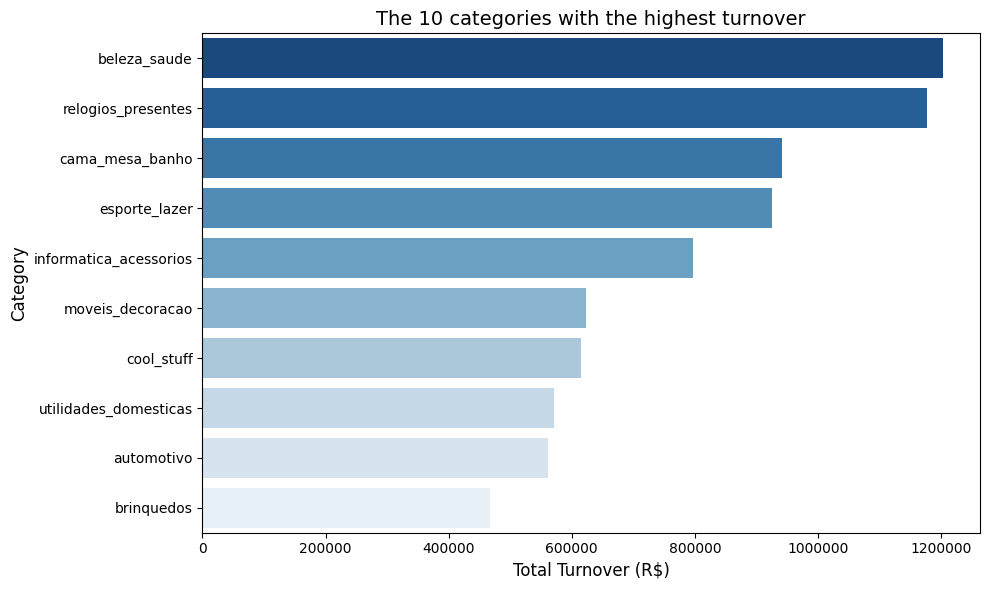

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_turnover.head(10),
    x='total_turnover',
    y='product_category_name',
    hue='product_category_name',
    legend=False,
    palette='Blues_r'
)

plt.title('The 10 categories with the highest turnover', fontsize=14)
plt.xlabel('Total Turnover (R$)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') # take scientific notation

plt.tight_layout()
plt.show()

<font color='blue'>
The <b>“beauty_health”</b> category leads the turnover ranking, totaling <b>R$ 1,203,129.05</b> in the period analyzed. In second place is “watches_gifts”, followed by “bed_table_bathroom”.
</font>

### e) Which Brazilian states have the highest average order value?

In [18]:
state_avg_value = pysqldf("""
WITH temp AS(
  SELECT DISTINCT
    order_id
    , customer_state
    , price + freight_value AS total_price
  FROM df_
)
  SELECT
    customer_state
    , AVG(total_price) AS avg_order_value
  FROM temp
  GROUP BY 1
  ORDER BY 2 DESC
""")

state_avg_value

,customer_state,avg_order_value
0,PB,241.406797
1,AC,225.209877
2,AL,220.047775
3,RO,217.950474
4,PA,206.956012
5,AP,204.399143
6,TO,202.675972
7,PI,199.237400
8,RN,199.182994
9,SE,193.971200


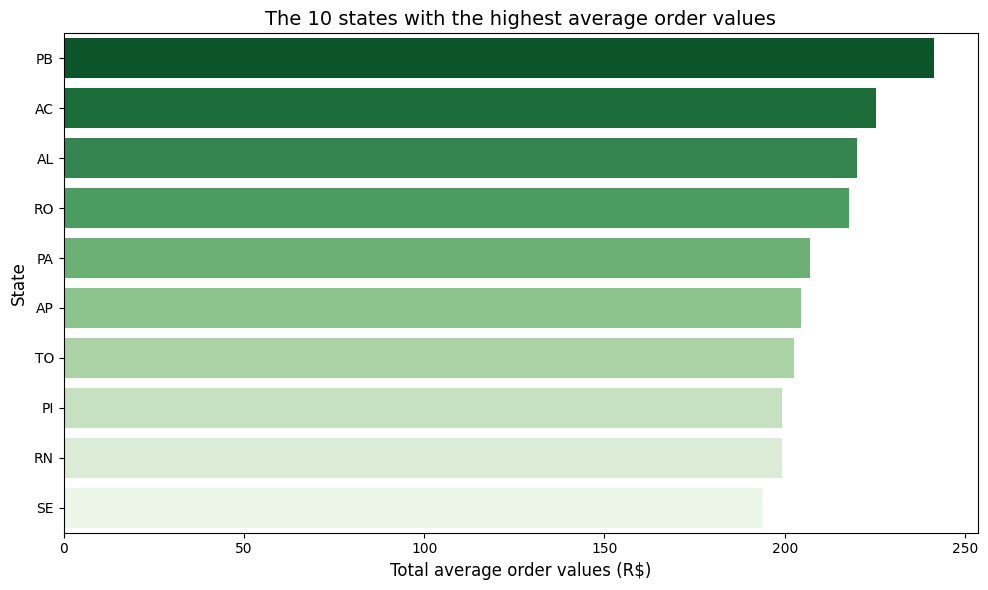

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=state_avg_value.head(10),
    x='avg_order_value',
    y='customer_state',
    hue='customer_state',
    legend=False,
    palette='Greens_r'
)

plt.title('The 10 states with the highest average order values', fontsize=14)
plt.xlabel('Total average order values (R$)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') # take scientific notation

plt.tight_layout()
plt.show()

<font color='blue'>The state with the highest average ticket was Paraíba, with R$241.41, followed by Acre and Alagoas.

- States in the North/Northeast region tend to have higher average tickets.
- This may reflect the type of products consumed or the distance from the logistics centers.
</font>